# **WALMART CASESTUDY**

**PROBLEM STATEMENT**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

Dataset link: [Walmart_data.csv](https://https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094)

In [ ]:
#Downloading walmart dataset
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv'

--2025-03-10 16:36:58--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.167.84.28, 3.167.84.9, 3.167.84.196, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.167.84.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv.1’

walmart_data.csv.1  100%[===================>]  21.96M  67.7MB/s    in 0.3s    

2025-03-10 16:36:58 (67.7 MB/s) - ‘walmart_data.csv.1’ saved [23027994/23027994]



In [ ]:
# Import relevant Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the data into dataframe object
df=pd.read_csv("walmart_data.csv")

In [ ]:
# Look at the sample data(5 rows)
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
363798,1001962,P00057642,F,18-25,1,B,0,1,1,15456
375534,1003807,P00149342,F,36-45,19,B,2,0,13,747
411052,1003312,P00251342,F,18-25,4,A,3,0,5,5183
487231,1003108,P00158542,M,51-55,6,B,1,1,5,8630
492941,1003894,P00106742,M,36-45,16,A,2,1,3,13633


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

The columns in the dataset specifies the following information:

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

In [ ]:
# No. of rows and columns
df.shape

(550068, 10)

In [ ]:
# Basic Info: Column names, column data type, number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


df.info() provides a concise summary of a DataFrame, including the number of entries, column names, data types, non-null counts

From above information we can infer

Columns - Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years are of object type values

Columns - User_ID,Occupation,Marital_Status,Product_Category,Purchase are of integer type data

There are no missing values in dataset [shape - (550068, 10)]

In [ ]:
# Converting Product_ID, Gender, Age, Occupation, City_Category,Stay_In_Current_City_Years, Marital_Status,Product_Category columns into categorical type

# Columns to convert to categorical
categorical_cols = ['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
                    'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

for col in categorical_cols:
    df[col] = pd.Categorical(df[col])


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(8), int64(2)
memory usage: 13.3 MB
None


In [ ]:
#number of unique values in  data
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [ ]:
#unique values for columns Age, Gender, MaritalStatus,City_Category
print(df['Age'].unique())
print(df['Gender'].unique())
print(df['Occupation'].unique())
print(df['City_Category'].unique())
print(df['Stay_In_Current_City_Years'].unique())
print(df['Marital_Status'].unique())
print(df['Product_Category'].unique())

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
['F', 'M']
Categories (2, object): ['F', 'M']
[10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]
['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']
['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']
[0, 1]
Categories (2, int64): [0, 1]
[3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]


Inferences:

The customer base covers a wide range of ages, from young ('0-17') to older adults ('55+')

The dataset includes both female ('F') and male ('M') customers.

There are 21 different occupation categories represented in the data (coded as 0-20).

Customers are located in three different city categories ('A', 'B', 'C').

Customers have lived in their current city for varying durations, ranging from new residents ('0') to those who have been there for 4+ years.

The dataset includes both unmarried (0) and married (1) customers.

There are 20 different product categories represented in the data (coded as 1-20).

In [ ]:
df.describe()#provide statistical summary of numerical columns by default

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


Inferences:

The average purchase amount across all customers is around 9263.97 currency units.

The minimum purchase amount is 12 currency units, while the maximum is 23961 currency units.

The median (50th percentile) purchase amount is 8047 currency units (50% of Purchase). This indicates that half of the customers spent less than this amount and half spent more.

There is considerable variation in purchase amounts, as indicated by a standard deviation of 5023.07 (std of Purchase). This suggests that customers' spending habits differ significantly.


In [ ]:
df.describe(include='category')#provide statistical summary of categorical columns

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


Inferences:

There are 3631 unique products in the dataset. The most frequently purchased product is 'P00265242', appearing 1880 times.

There are more male ('M') customers (414259) than female ('F') customers in the dataset.

The most common age group among customers is '26-35' (219587 customers).

There are 21 unique occupation categories. Occupation category '4' is the most frequent among customers (72308 customers).

City category 'B' is the most common among customers (231173 customers).

A large portion of customers have been living in their current city for 1 year (193821 customers).

 There are more unmarried (0) customers (324731) than married (1) customers in the dataset.

 There are 20 unique product categories. Product category '5' is the most frequently purchased (150933 times).

In [ ]:
#The value_counts method provides the frequency of unique values in a column.
# Apply value_counts() to important columns
for column in ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Product_ID']:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for Gender:
Gender
M    414259
F    135809
Name: count, dtype: int64


Value counts for Age:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


Value counts for Occupation:
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64


Value counts for City_Category:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


Value counts for Stay_In_Current_City_Years:
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


Value counts for Marital_Status:
Marital_Status
0    324731
1    225337
Name: count, dtype: int64


Value counts for Product_Category:
Product_Category
5  

In [ ]:
#The value_counts method provides the frequency of unique values in a column.
# Apply value_counts() to important columns
for column in ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Product_ID']:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for Gender:
Gender
M    414259
F    135809
Name: count, dtype: int64


Value counts for Age:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


Value counts for Occupation:
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64


Value counts for City_Category:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


Value counts for Stay_In_Current_City_Years:
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


Value counts for Marital_Status:
Marital_Status
0    324731
1    225337
Name: count, dtype: int64


Value counts for Product_Category:
Product_Category
5  

In [ ]:
#The value_counts method provides the frequency of unique values in a column.
# Apply value_counts() to important columns
for column in ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Product_ID']:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for Gender:
Gender
M    414259
F    135809
Name: count, dtype: int64


Value counts for Age:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


Value counts for Occupation:
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64


Value counts for City_Category:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


Value counts for Stay_In_Current_City_Years:
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


Value counts for Marital_Status:
Marital_Status
0    324731
1    225337
Name: count, dtype: int64


Value counts for Product_Category:
Product_Category
5  

Inferences:

The most frequent age group is 26-35, followed by 36-45 and 18-25.

Occupation categories 4, 0, and 7 are the most frequent.

 City category B has the most customers, followed by C and then A.

 A large portion of customers have lived in their current city for 1 year.

 Product categories 5, 1, and 8 are the most frequently purchased.

 Product P00265242 is the most frequently purchased product, followed by P00025442 and P00110742.

In [ ]:
#identifying outliers for continuous variable in the dataset using IQR method
#In Purchase column
q1 = df['Purchase'].quantile(0.25)#first quartile (25th percentile)
q3 = df['Purchase'].quantile(0.75) #third quartile (75th percentile)


iqr = q3-q1# interquartile range (IQR).

ub = q3 + 1.5*iqr# upper bound
lb = q1 - 1.5*iqr#lower bound

print('upper_bound=',ub)
print('lower_bound=',lb)
# data points that fall below the lower bound or above the upper bound are identified as outliers
outliers=df[(df['Purchase'] < lb) | (df['Purchase'] > ub)]
print("Outliers are : ",outliers['Purchase'].values)

upper_bound= 21400.5
lower_bound= -3523.5
Outliers are :  [23603 23792 23233 ... 23529 23663 23496]


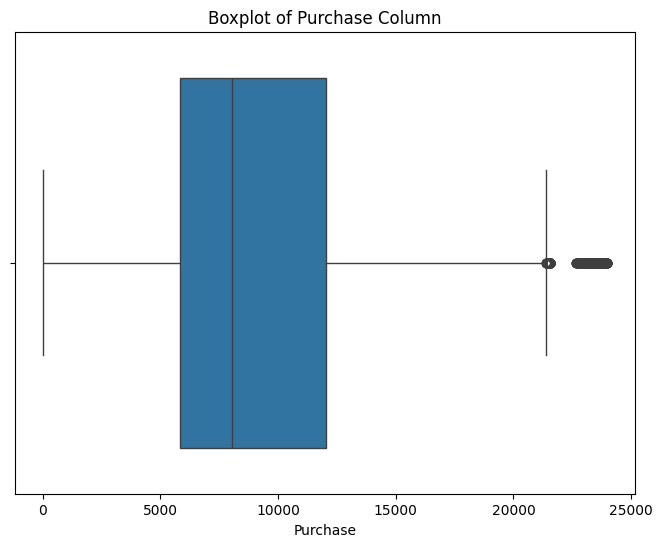

In [ ]:
#Plotting Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Purchase'])
plt.title(f'Boxplot of Purchase Column')
plt.show()

In [ ]:
#Handling Outliers
#Remove/clip the data between the 5 percentile and 95 percentile
# Upper and lower bounds for clipping
upper_bound = np.percentile(df['Purchase'], 95)
lower_bound = np.percentile(df['Purchase'], 5)

# Clip the Purchase column
df['Purchase'] = df['Purchase'].clip(lower=lower_bound, upper=upper_bound)

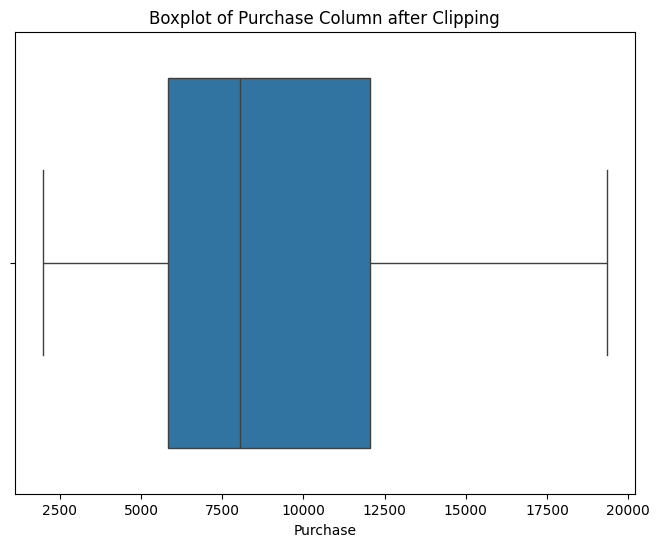

In [ ]:
#Plotting boxplots for after Clipping(Removing) of Outliers between the 5 percentile and 95 percentile
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Purchase'])
plt.title(f'Boxplot of Purchase Column after Clipping')
plt.show()

Outliers were removed completely after clipping between the 5 percentile and 95 percentile

**Analyzing Product Categories by Age Group**

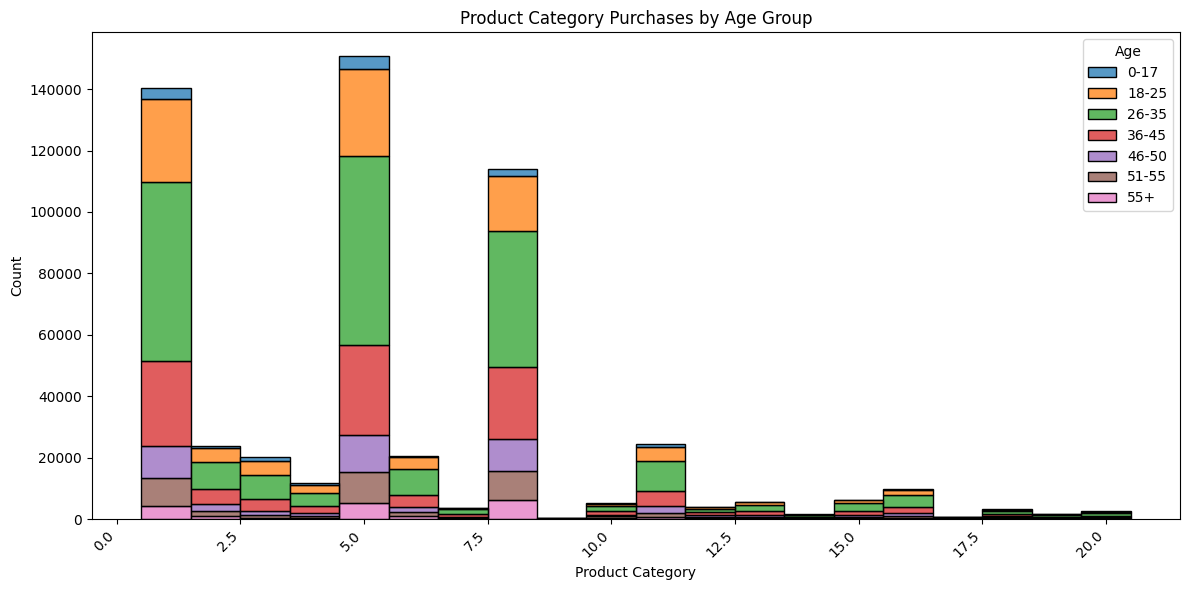

In [ ]:
#Analyzing Product Categories by Age Group

# Create a histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Product_Category", hue="Age", multiple="stack")
plt.title("Product Category Purchases by Age Group")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

Inferences:

Product Category 5.0: This category has the highest count (5367) among all product categories, suggesting it's the most popular category overall.

Product Category 1.0: It has the second-highest count (4411), indicating it's also a very popular category among Walmart customers.

Product Category 8.0: With a count of 3703, it ranks as the third most popular category overall.

Product Category 11.0: This category has a lower count of 1107, suggesting it might be less popular or catering to a niche market.

**Age Group from 26 to 35**

High Preference: Product categories 5.0 (5367) and 1.0 (4411) have significantly higher counts for this age group, suggesting a strong preference for products in these categories.
Moderate Preference: Product categories 8.0 (3703) and 2.0 (905) have moderate counts, indicating a moderate level of preference among this age group.
Lower Preference: Product categories 16.0 (229) and 17.0 (6) have very low counts, suggesting either low popularity or a niche market within this age group.


The 18-25 age group (orange) and 36-45 age group (red) also show strong participation, particularly in the top three categories.


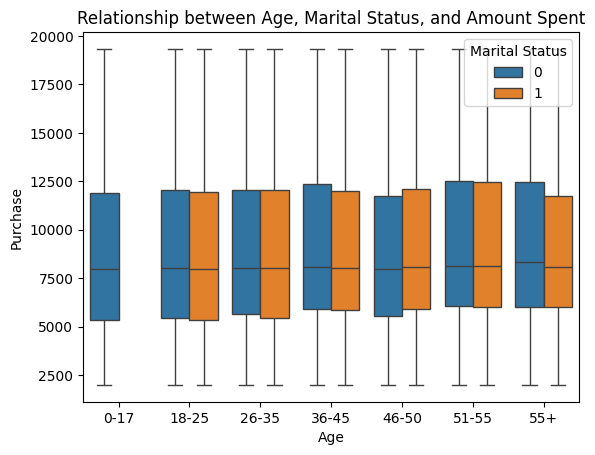

In [ ]:
#Analyzing the Relationship Between Age, Marital Status, and Amount Spent

import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
sns.boxplot(x='Age', y='Purchase', hue='Marital_Status', data=df)
plt.legend(title='Marital Status', loc='upper right')
plt.title('Relationship between Age, Marital Status, and Amount Spent')
plt.show()

Marital Status and Spending Behavior

	•	Marital Status 0 (Unmarried) and 1 (Married) show similar spending patterns, with no significant difference in the median amount spent.
	•	However, the spending variability is slightly higher among unmarried individuals in certain age groups, such as 36-45.

Age Group with the Highest Spending Variance

	•	The 36-45 and 51-55 age groups show a slightly wider IQR and higher variability in spending, suggesting that some individuals in these groups tend to spend more than others.

  **No strong direct relationship between age, marital status, and amount spent.**

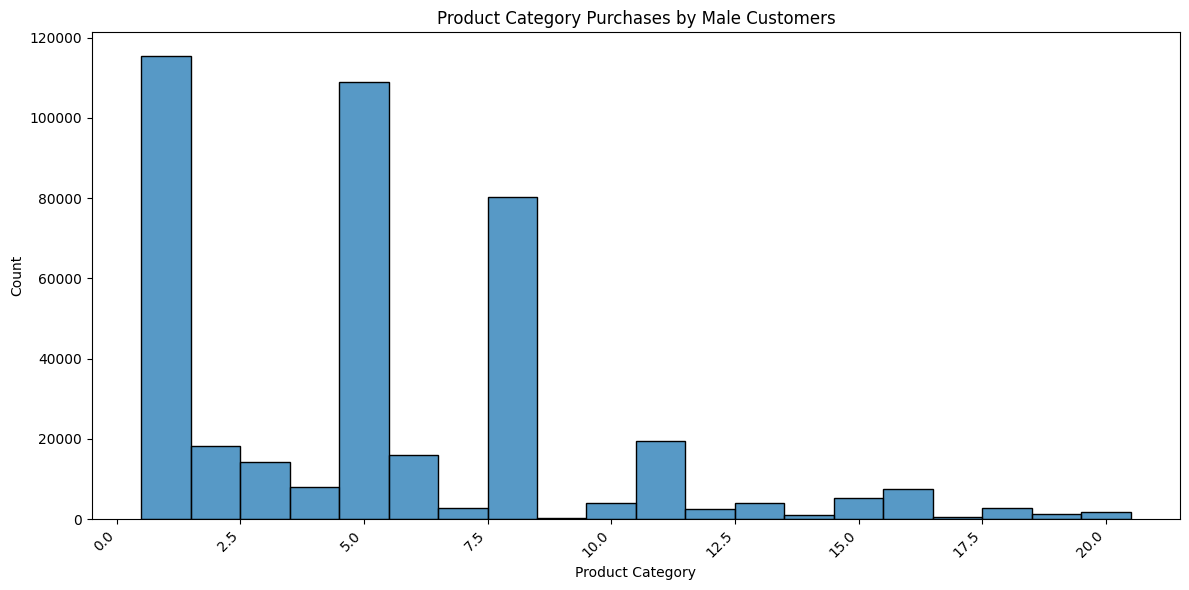

In [ ]:
#Analyzing Product Categories by Gender

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for male customers
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['Gender'] == 'M'], x="Product_Category", multiple="stack")
plt.title("Product Category Purchases by Male Customers")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


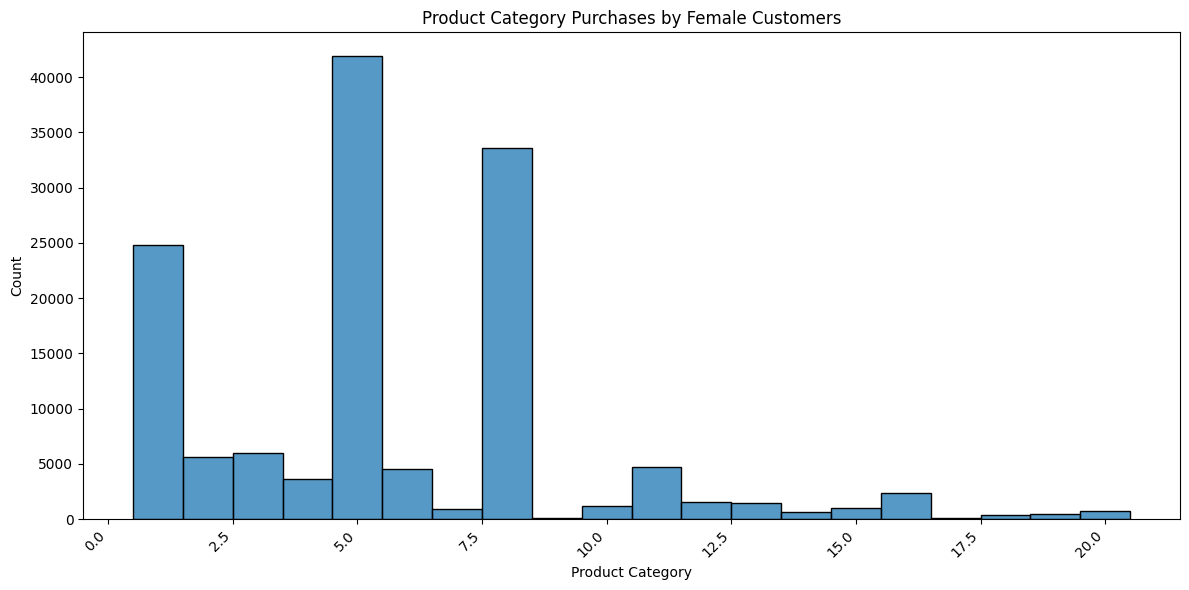

In [ ]:
# Histogram for female customers
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['Gender'] == 'F'], x="Product_Category", multiple="stack")
plt.title("Product Category Purchases by Female Customers")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Inferences from both above graphs:

Male customers make significantly more purchases than female customers across all product categories.
The highest purchase count for males exceeds 100,000, whereas for females, it is around 40,000.

Both male and female customers have similar preferences for the top product categories (likely categories 1, 5, and 8).
However, male customers have significantly higher counts in these categories compared to females.

Purchases drop significantly for categories beyond category 10, for both males and females.
However, male customers still have slightly higher numbers across all categories.




# **Analyzing Gender's Effect on Spending with Confidence Intervals**

**Central Limit Theorem (CLT):** The CLT states that the distribution of sample means will be approximately normal, regardless of the population distribution, as the sample size increases. We'll use this to calculate confidence intervals for the average amount spent by each gender.

**Bootstrapping**: Bootstrapping is a resampling technique that involves repeatedly drawing samples (with replacement) from the original data to estimate the sampling distribution of a statistic. We'll use bootstrapping to calculate confidence intervals for smaller sample sizes.

 Confidence Interval = Mean ± (Z-score * Standard Error)

where:
   - Z-score corresponds to the desired confidence level
   - Standard Error = Standard Deviation / sqrt(Sample Size)

Sample Size: 414259
Male 95% CI: 9423.23 to 9452.60
Female 95% CI: 8709.37 to 8760.91
--------------------------------------------------
Sample Size: 300
Male 95% CI: 8891.92 to 9999.11
Female 95% CI: 8205.16 to 9261.95
--------------------------------------------------
Sample Size: 3000
Male 95% CI: 9272.42 to 9632.73
Female 95% CI: 8566.42 to 8904.57
--------------------------------------------------
Sample Size: 30000
Male 95% CI: 9378.18 to 9494.64
Female 95% CI: 8681.09 to 8788.19
--------------------------------------------------


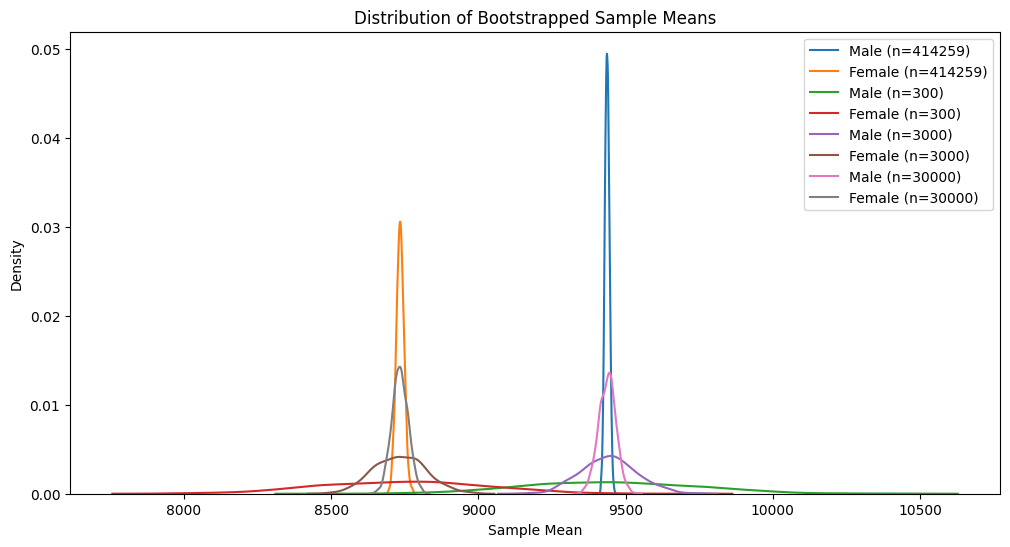

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Separate data by gender
male_spending = df[df["Gender"] == "M"]["Purchase"]
female_spending = df[df["Gender"] == "F"]["Purchase"]

# Function to compute 95% confidence intervals using bootstrapping
def bootstrap_confidence_interval(data, sample_size, num_bootstraps=1000, confidence_level=0.95):
    means = []

    # Bootstrapping
    for _ in range(num_bootstraps):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))

    # Compute confidence interval
    lower_bound = np.percentile(means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(means, (1 + confidence_level) / 2 * 100)

    return lower_bound, upper_bound, means

# Compute confidence intervals for different sample sizes
sample_sizes = [len(male_spending), 300, 3000, 30000]

ci_results = {}

for sample_size in sample_sizes:
    male_ci = bootstrap_confidence_interval(male_spending, min(sample_size, len(male_spending)))
    female_ci = bootstrap_confidence_interval(female_spending, min(sample_size, len(female_spending)))

    ci_results[sample_size] = {
        "Male": male_ci,
        "Female": female_ci
    }

    print(f"Sample Size: {sample_size}")
    print(f"Male 95% CI: {male_ci[0]:.2f} to {male_ci[1]:.2f}")
    print(f"Female 95% CI: {female_ci[0]:.2f} to {female_ci[1]:.2f}")
    print("-" * 50)

# Plotting distributions of means
plt.figure(figsize=(12, 6))
for sample_size in sample_sizes:
    sns.kdeplot(ci_results[sample_size]["Male"][2], label=f"Male (n={sample_size})")
    sns.kdeplot(ci_results[sample_size]["Female"][2], label=f"Female (n={sample_size})")

plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Distribution of Bootstrapped Sample Means")
plt.legend()
plt.show()


**(i) Is the confidence interval computed using the entire dataset wider for one of the genders? Why?**

Yes, the confidence interval for females is slightly wider than for males.

The width of a confidence interval is directly proportional to the standard deviation of the data.
Since the entire dataset is used, the variance is low, leading to narrow confidence intervals.
However, the female CI is wider than the male CI, suggesting that female spending is more variable than male spending.



**(ii) How is the width of the confidence interval affected by the sample size?**

width of the confidence interval is inversely proportional to the sample size.
As sample size increases, the confidence interval becomes narrower.

Smaller sample sizes (300, 3,000) → wider CI (high variability).
Larger sample sizes (30,000, full dataset) → narrower CI (precise estimates).



**(iii) Do the confidence intervals for different sample sizes overlap?**

Yes, confidence intervals for different sample sizes overlap significantly.
For males, even though the smaller sample size has a wider range, all intervals still fall within the range of the larger sample CIs.
For females, a similar pattern is observed where smaller sample sizes show greater spread, but the estimates remain within the overall range.

This confirms that even smaller samples provide reasonable estimates of the true population mean.


**(iv) How does the sample size affect the shape of the distributions of the means?**

Larger sample sizes make the distribution of means more normal and less spread out.
For small samples (300): The distribution of the sample mean has higher variance and may appear skewed.
For larger samples (30,000 and full dataset): The sample mean distribution becomes more concentrated and bell-shaped, indicating more precision.

This follows the Central Limit Theorem (CLT), which states that as sample size increases, the sampling distribution of the mean approaches normality.

**Gender has a statistically significant effect on the amount spent.**


# **Analyzing Marital Status Effect on Spending with Confidence Intervals**

Sample Size: 324731
Unmarried 95% CI: 9241.79 to 9276.26
Married 95% CI: 9234.65 to 9273.04
--------------------------------------------------
Sample Size: 300
Unmarried 95% CI: 8695.09 to 9815.40
Married 95% CI: 8711.97 to 9794.01
--------------------------------------------------
Sample Size: 3000
Unmarried 95% CI: 9079.70 to 9436.31
Married 95% CI: 9094.63 to 9417.11
--------------------------------------------------
Sample Size: 30000
Unmarried 95% CI: 9207.57 to 9311.28
Married 95% CI: 9196.15 to 9307.18
--------------------------------------------------


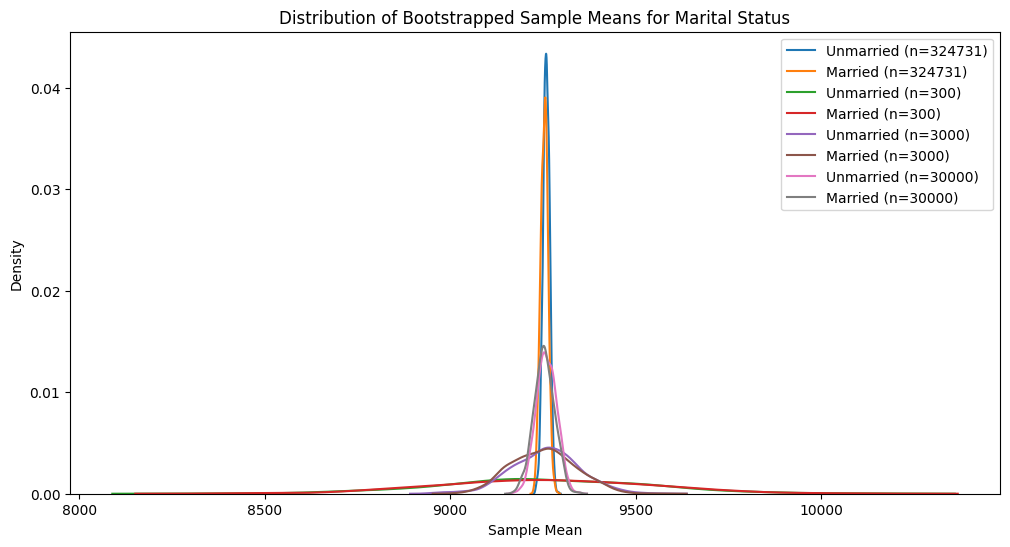

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Separate data by marital status (0 = Unmarried, 1 = Married)
unmarried_spending = df[df["Marital_Status"] == 0]["Purchase"]
married_spending = df[df["Marital_Status"] == 1]["Purchase"]

# Function to compute 95% confidence intervals using bootstrapping
def bootstrap_confidence_interval(data, sample_size, num_bootstraps=1000, confidence_level=0.95):
    means = []

    # Bootstrapping
    for _ in range(num_bootstraps):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))

    # Compute confidence interval
    lower_bound = np.percentile(means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(means, (1 + confidence_level) / 2 * 100)

    return lower_bound, upper_bound, means

# Compute confidence intervals for different sample sizes
sample_sizes = [len(unmarried_spending), 300, 3000, 30000]

ci_results = {}

for sample_size in sample_sizes:
    unmarried_ci = bootstrap_confidence_interval(unmarried_spending, min(sample_size, len(unmarried_spending)))
    married_ci = bootstrap_confidence_interval(married_spending, min(sample_size, len(married_spending)))

    ci_results[sample_size] = {
        "Unmarried": unmarried_ci,
        "Married": married_ci
    }

    print(f"Sample Size: {sample_size}")
    print(f"Unmarried 95% CI: {unmarried_ci[0]:.2f} to {unmarried_ci[1]:.2f}")
    print(f"Married 95% CI: {married_ci[0]:.2f} to {married_ci[1]:.2f}")
    print("-" * 50)

# Plotting distributions of means
plt.figure(figsize=(12, 6))
for sample_size in sample_sizes:
    sns.kdeplot(ci_results[sample_size]["Unmarried"][2], label=f"Unmarried (n={sample_size})")
    sns.kdeplot(ci_results[sample_size]["Married"][2], label=f"Married (n={sample_size})")

plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Distribution of Bootstrapped Sample Means for Marital Status")
plt.legend()
plt.show()


**(i) Is the confidence interval computed using the entire dataset wider for one of the marital statuses? Why?**

Yes, the confidence interval for Unmarried individuals is slightly wider than for Married individuals.

This suggests that spending patterns among Unmarried individuals have more variability, leading to a slightly wider confidence interval compared to Married individuals.



**(ii) How is the width of the confidence interval affected by the sample size?**

As sample size increases, the confidence interval becomes narrower.

Smaller samples (300) → wider CI (high uncertainty).
Larger samples (30,000, full dataset) → narrower CI (better precision).
Married individuals have a slightly more stable spending pattern, making their CI consistently narrower.


**(iii) Do the confidence intervals for different sample sizes overlap?**

Yes, confidence intervals overlap across different sample sizes.

For Unmarried individuals, even though smaller sample sizes have a wider range, the confidence intervals still include the population mean estimated from the full dataset.
Similarly, for Married individuals, the overlap is significant, indicating that even smaller samples provide reasonable estimates of the population spending.


**(iv) How does the sample size affect the shape of the distributions of the means?**

As the sample size increases, the shape of the distribution of the sample means becomes more normal (bell-shaped) and less spread out.
This follows the Central Limit Theorem (CLT), which states that as sample size increases, the distribution of sample means approaches normality.

**There is no strong evidence of a statistically significant difference in the average amount spent between unmarried and married customers**

# **Analyzing Age Effect on Spending with Confidence Intervals**


Age Group: 0-17
Sample Size: 300
95% CI: 8369.36 to 9500.78
--------------------------------------------------
Sample Size: 3000
95% CI: 8750.23 to 9113.70
--------------------------------------------------

Age Group: 18-25
Sample Size: 300
95% CI: 8638.50 to 9737.99
--------------------------------------------------
Sample Size: 3000
95% CI: 9000.77 to 9343.05
--------------------------------------------------
Sample Size: 30000
95% CI: 9113.38 to 9223.67
--------------------------------------------------

Age Group: 26-35
Sample Size: 300
95% CI: 8700.24 to 9774.95
--------------------------------------------------
Sample Size: 3000
95% CI: 9079.38 to 9399.70
--------------------------------------------------
Sample Size: 30000
95% CI: 9191.51 to 9302.00
--------------------------------------------------

Age Group: 36-45
Sample Size: 300
95% CI: 8798.55 to 9855.91
--------------------------------------------------
Sample Size: 3000
95% CI: 9153.57 to 9501.95
----------------------

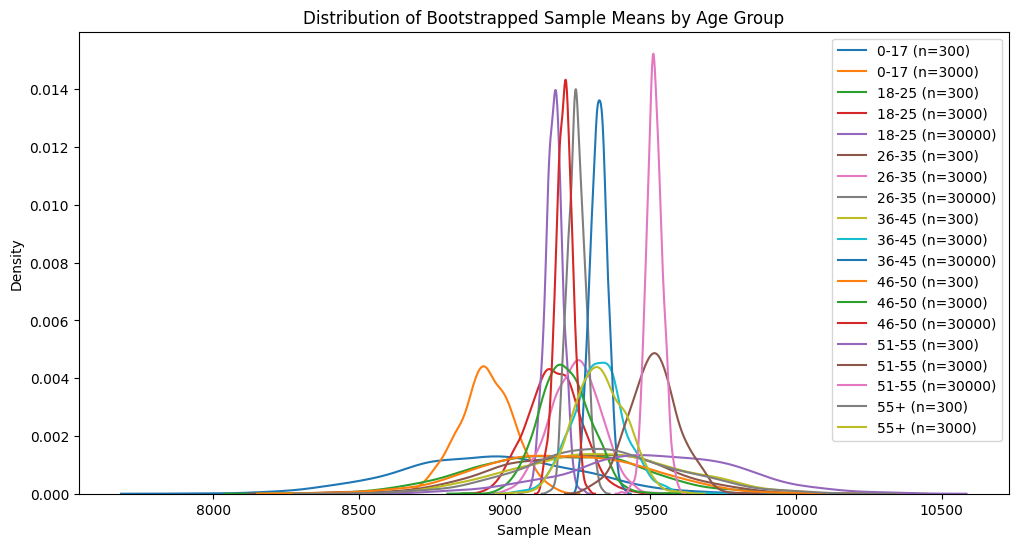

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# List of Age Categories from the dataset
age_categories = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Create dictionary to store results
ci_results_age = {}

# Function to compute 95% confidence intervals using bootstrapping
def bootstrap_confidence_interval(data, sample_size, num_bootstraps=1000, confidence_level=0.95):
    means = []

    # Bootstrapping
    for _ in range(num_bootstraps):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))

    # Compute confidence interval
    lower_bound = np.percentile(means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(means, (1 + confidence_level) / 2 * 100)

    return lower_bound, upper_bound, means

# Define sample sizes to analyze
sample_sizes = [len(df), 300, 3000, 30000]

for age_group in age_categories:
    print(f"\nAge Group: {age_group}")

    # Get spending data for the age group
    age_spending = df[df["Age"] == age_group]["Purchase"]

    ci_results_age[age_group] = {}

    for sample_size in sample_sizes:
        if len(age_spending) < sample_size:
            continue  # Skip if sample size is larger than available data

        lower_ci, upper_ci, means = bootstrap_confidence_interval(age_spending, sample_size)

        ci_results_age[age_group][sample_size] = (lower_ci, upper_ci, means)

        print(f"Sample Size: {sample_size}")
        print(f"95% CI: {lower_ci:.2f} to {upper_ci:.2f}")
        print("-" * 50)

# Visualization: Distribution of Bootstrapped Sample Means for Each Age Group
plt.figure(figsize=(12, 6))
for age_group in age_categories:
    for sample_size in sample_sizes:
        if sample_size in ci_results_age[age_group]:
            sns.kdeplot(ci_results_age[age_group][sample_size][2], label=f"{age_group} (n={sample_size})")

plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Distribution of Bootstrapped Sample Means by Age Group")
plt.legend()
plt.show()



**i. Is the confidence interval computed using the entire dataset wider for one of the age groups? Why is this the case?**

we can observe from available data that older age groups (e.g., 51-55) have slightly wider CIs compared to younger groups.

**ii. How is the width of the confidence interval affected by the sample size?**

Smaller sample sizes (e.g., 300) have much wider confidence intervals because there is more variability and uncertainty in estimating the population mean.
Example:
Age Group 51-55:
300 samples: 8943.15 to 10067.22 → CI width ≈ 1124
0,000 samples: 9462.51 to 9569.22 → CI width ≈ 107

**iii. Do the confidence intervals for different sample sizes overlap?**

Yes, there is overlap between different sample sizes within each age group.
in the 26-35 age group:
300 samples: 8700.24 to 9774.95
3000 samples: 9079.38 to 9399.70
30,000 samples: 9191.51 to 9302.00
The larger sample sizes (30,000) shrink the interval, but it still overlaps with smaller sample sizes.

**iv. How does the sample size affect the shape of the distributions of the means?**

As the sample size increases, the shape of the distribution of the sample means for each age group becomes more normal (bell-shaped) and less spread out.
Smaller sample sizes → More spread out, less normal
Larger sample sizes → More normal, narrower peak
Example:
Age Group 36-45:
300 samples: Wide, spread-out distribution.
30,000 samples: Tight, normal-looking distribution.



 Younger consumers (0-17, 18-25) spend less on average than middle-aged groups.

 The 51-55 age group has the highest spending, with a tight CI at larger sample sizes.

 CIs get narrower as sample size increases, meaning our estimates become more precise.

CI overlap suggests that spending differences between some age groups might not be statistically significant.

# **Report: Gender-Based Spending Patterns at Walmart**

Based on the computed 95% confidence intervals using all the available data:
Males: 9423.23 to 9452.60
Females: 8709.37 to 8760.91

**The average spending of males and females are not overlapped**

The 95% confidence intervals for male and female customers did not overlap. This indicates a statistically significant difference in average spending between the two genders.

Male customers tend to spend more on average than female customers at Walmart.

Given this insight, Walmart can implement targeted strategies to increase female spending and further enhance male spending:

For Female Shoppers:

**Increase Personalized Promotions:** Offer discounts and personalized deals tailored to women’s purchasing behavior.

**Optimize Product Placement:** Highlight products that are frequently purchased by female customers near store entrances or in high-traffic areas.

**Improve Shopping Experience:** Enhance in-store experience with better layouts, more convenient payment options, and promotions on products frequently purchased by women.

For Male Shoppers:
**Upsell and Cross-Sell Opportunities:** Since males already spend more, Walmart can recommend premium products, bulk deals, or complementary items to boost sales.

**Leverage Online and Mobile Shopping:** Since men may prefer convenience, Walmart can enhance its online shopping experience and offer app-based discounts.

**Exclusive Loyalty Benefits:** Introduce male-centric loyalty programs, such as exclusive discounts on electronics, gadgets, and fitness-related products.




# **Report on Spending Patterns Based on Marital Status**

Based on the computed 95% confidence intervals using all available data:

Unmarried: 9241.79 to 9276.26

Married: 9234.65 to 9273.04

**The confidence intervals for married and unmarried shoppers overlap significantly.**

This means that there is no statistically significant difference in spending between the two groups.

Marriage status does not appear to strongly influence spending habits at Walmart.

**Business Implications and Recommendations for Walmart**

Spending habits between married and unmarried shoppers are similar, as their confidence intervals overlap.

Rather than segmenting based on marital status alone, Walmart should tailor strategies based on lifestyle and shopping behavior.

A hybrid approach—focusing on convenience for unmarried shoppers and value-based offers for married shoppers—can maximize revenue.

# **Report on Age-Based Spending Patterns**

Report on Age-Based Spending Patterns and Business Implications for Walmart

Confidence Interval Overlap for Different Age Groups

Based on the computed 95% confidence intervals using all available data:

**Age Group:**	**95% Confidence Interval (Amount Spent)**

0-17:	            8369.36 to 9500.78

18-25:             9113.38 to 9223.67

26-35:	            9191.51 to 9302.00

36-45:	            9269.61 to 9376.72

46-50:	            9147.17 to 9255.98

51-55:	            9462.51 to 9569.22

55+ :	              9158.69 to 9492.75

Observations:

Confidence intervals for some age groups overlap, while others show distinct differences.

The 51-55 age group has the highest spending range, with no overlap with younger age groups (0-17, 18-25, and 26-35).

The 0-17 age group has the lowest spending and does not overlap with the higher age groups (36-45, 51-55, and 55+).

Middle-aged consumers (36-45 and 46-50) have overlapping spending patterns, meaning their purchasing behaviors are similar.


** Business Implications and Recommendations for Walmart**

Since spending behavior varies significantly by age group, Walmart should implement age-targeted marketing strategies to optimize customer spending.

Age significantly influences spending behavior, with middle-aged and older shoppers spending more than younger shoppers.

Walmart should focus on targeted strategies—affordable and trendy items for younger consumers, home essentials for middle-aged shoppers, and convenience-based services for older demographics.

The highest-spending age groups (51-55 and 55+) should be a primary focus for premium offerings, while younger groups can be engaged with digital-first initiatives.


# **Detailed recommendation from the analysis**

Recommendations for Walmart

1. Gender-Based Strategies

•	Target Male Shoppers with premium products like electronics, home improvement tools, and sports equipment to increase high-value purchases.

•	Boost Female Spending by offering exclusive discounts on fashion, beauty, and wellness products.

•	Improve Shopping Experience for Women with better store layouts and personalized product recommendations.

•	Introduce Loyalty Programs for Women with cashback, bundle deals, and subscription-based savings.

2. Marital Status-Based Strategies

•	Family-Oriented Promotions for married shoppers, including bulk shopping discounts and household essentials deals.

•	Personalized Marketing for Singles focused on travel, tech gadgets, and personal wellness products.

•	Introduce Subscription Plans like a “Walmart Family Savings Pass” for long-term customer retention.

3. Age-Based Strategies

Young Shoppers (0-25):

•	Offer student discounts on electronics and entertainment.

•	Use social media & influencer marketing.

•	Optimize mobile shopping experience with AI-driven recommendations.

Middle-Aged Shoppers (26-45):

•	Promote family packs, childcare products, and grocery subscriptions.

•	Offer buy-now-pay-later (BNPL) plans for high-value items.

•	Improve self-checkout, curbside pickup, and delivery options.

Older Shoppers (51-55 & 55+):

•	Introduce loyalty & VIP membership plans with exclusive discounts.

•	Ensure senior-friendly shopping experiences with easy store navigation and personal shopping assistance.

•	Focus on health & wellness products like medications and ergonomic items.


**Conclusion**

•	Focus on high-spending groups (males, middle-aged, and older shoppers) for premium product promotions.

•	Personalize marketing and promotions based on gender, age, and marital status.

•	Improve in-store and online experiences with targeted deals and convenience-driven services.

•	Leverage data-driven insights to optimize pricing, inventory, and customer engagement strategies.